In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from google.colab import files
import numpy
import tensorflow as tf

In [4]:
files.upload()
from google.colab import data_table
data_table.disable_dataframe_formatter()
df=pd.read_csv("AAPL .csv")

Saving AAPL .csv to AAPL .csv


In [5]:
df.head()


,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [6]:
data = df['open']
cl = df['close']


<Axes: xlabel='open', ylabel='Count'>

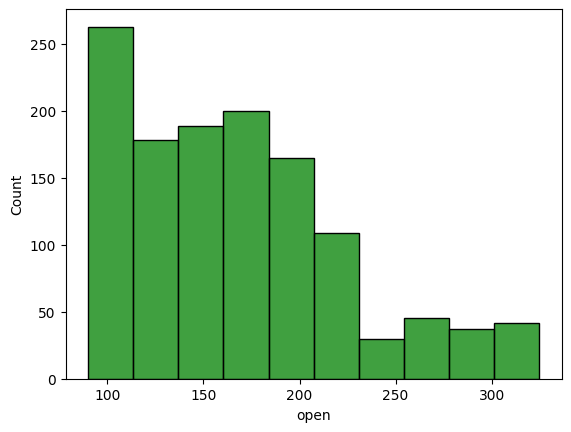

In [7]:
sns.histplot(data, bins=10,color='green')

In [8]:
df.tail()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.96,316.50,310.3241,313.17,33843125,314.96,316.50,310.3241,313.17,33843125,0.0,1.0
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.14,318.52,313.0100,315.03,25432385,313.14,318.52,313.0100,315.03,25432385,0.0,1.0
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.23,319.52,316.2000,316.68,27876215,319.23,319.52,316.2000,316.68,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.85,320.89,315.8700,318.66,25672211,316.85,320.89,315.8700,318.66,25672211,0.0,1.0
1257,1257,AAPL,2020-05-22 00:00:00+00:00,318.89,319.23,315.3500,315.77,20450754,318.89,319.23,315.3500,315.77,20450754,0.0,1.0


In [9]:
df1 = df.reset_index()['close']

In [10]:
df1

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

In [11]:
df1.shape

(1258,)

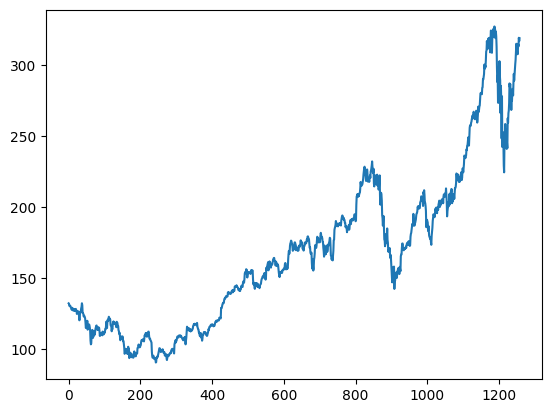

In [12]:
plt.plot(df1)

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [14]:
print(df1)

[[0.17607447]
 [0.17495567]
 [0.16862282]
 ...
 [0.96635143]
 [0.9563033 ]
 [0.96491598]]


In [15]:
df1.shape

(1258, 1)

In [16]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]


In [17]:
training_size

817

In [18]:
test_size

441

In [19]:
def create_dataset(dataset,time_step):
    dataX, dataY = [],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX), np.array(dataY)

In [20]:
time_step = 100
X_train, y_train = create_dataset(train_data,time_step)
X_test,ytest = create_dataset(test_data,time_step)

In [21]:

print(X_train)

[[0.17607447 0.17495567 0.16862282 ... 0.09055982 0.08388922 0.09085536]
 [0.17495567 0.16862282 0.1696994  ... 0.08388922 0.09085536 0.0873934 ]
 [0.16862282 0.1696994  0.16727181 ... 0.09085536 0.0873934  0.09030651]
 ...
 [0.34801148 0.32930845 0.32145571 ... 0.50042219 0.50413747 0.5062062 ]
 [0.32930845 0.32145571 0.32694419 ... 0.50413747 0.5062062  0.51920966]
 [0.32145571 0.32694419 0.32230009 ... 0.5062062  0.51920966 0.53719497]]


In [22]:
print(X_test.shape)
print(ytest.shape)
print(X_train.shape[1])

(340, 100)
(340,)
100


In [23]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [24]:
X_train

array([[[0.17607447],
        [0.17495567],
        [0.16862282],
        ...,
        [0.09055982],
        [0.08388922],
        [0.09085536]],

       [[0.17495567],
        [0.16862282],
        [0.1696994 ],
        ...,
        [0.08388922],
        [0.09085536],
        [0.0873934 ]],

       [[0.16862282],
        [0.1696994 ],
        [0.16727181],
        ...,
        [0.09085536],
        [0.0873934 ],
        [0.09030651]],

       ...,

       [[0.34801148],
        [0.32930845],
        [0.32145571],
        ...,
        [0.50042219],
        [0.50413747],
        [0.5062062 ]],

       [[0.32930845],
        [0.32145571],
        [0.32694419],
        ...,
        [0.50413747],
        [0.5062062 ],
        [0.51920966]],

       [[0.32145571],
        [0.32694419],
        [0.32230009],
        ...,
        [0.5062062 ],
        [0.51920966],
        [0.53719497]]])

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [26]:
model = Sequential()
model.add(LSTM(50,return_sequences = True,input_shape = (100,1)))
model.add((LSTM(50,return_sequences = True)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error',optimizer  = 'adam')

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.fit(X_train,y_train,validation_data = (X_test,ytest),epochs = 100,batch_size = 64)

Epoch 1/100
12/12 [==============================] - 10s 347ms/step - loss: 0.0151 - val_loss: 0.0628
Epoch 2/100
12/12 [==============================] - 4s 327ms/step - loss: 0.0033 - val_loss: 0.0053
Epoch 3/100
12/12 [==============================] - 3s 237ms/step - loss: 9.5526e-04 - val_loss: 0.0055
Epoch 4/100
12/12 [==============================] - 3s 225ms/step - loss: 7.3886e-04 - val_loss: 0.0041
Epoch 5/100
12/12 [==============================] - 3s 214ms/step - loss: 6.2531e-04 - val_loss: 0.0049
Epoch 6/100
12/12 [==============================] - 3s 298ms/step - loss: 6.3623e-04 - val_loss: 0.0047
Epoch 7/100
12/12 [==============================] - 3s 236ms/step - loss: 6.1083e-04 - val_loss: 0.0041
Epoch 8/100
12/12 [==============================] - 3s 226ms/step - loss: 5.9567e-04 - val_loss: 0.0043
Epoch 9/100
12/12 [==============================] - 3s 223ms/step - loss: 5.8384e-04 - val_loss: 0.0036
Epoch 10/100
12/12 [==============================] - 3s 212ms

In [29]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

11/11 [==============================] - 1s 46ms/step


In [30]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [31]:
import math
from sklearn.metrics import mean_squared_error

In [32]:
print(math.sqrt(mean_squared_error(y_train,train_predict)))
print(math.sqrt(mean_squared_error(ytest,test_predict)))

142.49709074153017
241.90581968276868


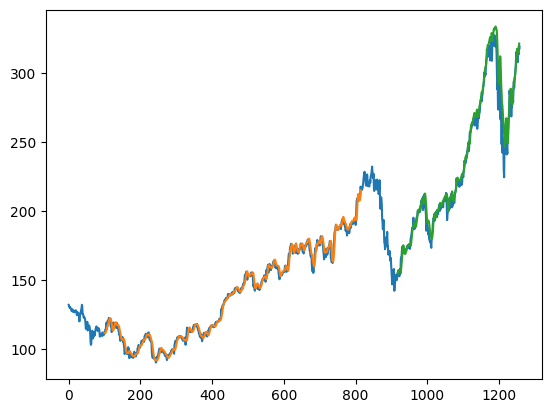

In [33]:
# shift train predictions for plotting
look_back = 100
trainpredictplot = numpy.empty_like(df1)
trainpredictplot[:, : ] = np.nan
trainpredictplot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testpredictplot = numpy.empty_like(df1)
testpredictplot[ :,:]=numpy.nan
testpredictplot[len(train_predict)+(look_back*2)+1:len(df1)-1,:]=test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainpredictplot)
plt.plot(testpredictplot)
plt.show()

In [34]:
len(test_data)

441

In [35]:
x_input=test_data[341:].reshape(1,-1)
x_input

array([[0.85835515, 0.8866419 , 0.87431394, 0.88431985, 0.87836697,
        0.8986321 , 0.92582116, 0.92877649, 0.95676771, 0.93869797,
        0.93304061, 0.94950604, 0.96424048, 0.95512117, 0.95989192,
        0.96635143, 0.96246728, 0.92295027, 0.9598497 , 0.98792536,
        0.98594106, 0.92531453, 0.92172591, 0.96474711, 0.97572406,
        0.99159841, 0.96972895, 0.97614625, 0.96795575, 1.        ,
        0.99016297, 0.99050072, 0.96538039, 0.98488559, 0.97086887,
        0.94026007, 0.87748037, 0.83483915, 0.85413324, 0.77336823,
        0.77269273, 0.88014017, 0.84007431, 0.89673225, 0.85527316,
        0.83884995, 0.74233725, 0.82327113, 0.78143207, 0.6665963 ,
        0.7921557 , 0.64118044, 0.68614371, 0.66001013, 0.65203074,
        0.58642236, 0.56586169, 0.66089673, 0.65515494, 0.70970193,
        0.66452757, 0.69437642, 0.69218104, 0.63569197, 0.65266402,
        0.63780292, 0.7267162 , 0.71388162, 0.74191506, 0.75002111,
        0.77222832, 0.83049059, 0.8194292 , 0.82

In [36]:
temp_input=list(x_input)
print(temp_input)
temp_input=temp_input[0].tolist()
print(temp_input)

[array([0.85835515, 0.8866419 , 0.87431394, 0.88431985, 0.87836697,
       0.8986321 , 0.92582116, 0.92877649, 0.95676771, 0.93869797,
       0.93304061, 0.94950604, 0.96424048, 0.95512117, 0.95989192,
       0.96635143, 0.96246728, 0.92295027, 0.9598497 , 0.98792536,
       0.98594106, 0.92531453, 0.92172591, 0.96474711, 0.97572406,
       0.99159841, 0.96972895, 0.97614625, 0.96795575, 1.        ,
       0.99016297, 0.99050072, 0.96538039, 0.98488559, 0.97086887,
       0.94026007, 0.87748037, 0.83483915, 0.85413324, 0.77336823,
       0.77269273, 0.88014017, 0.84007431, 0.89673225, 0.85527316,
       0.83884995, 0.74233725, 0.82327113, 0.78143207, 0.6665963 ,
       0.7921557 , 0.64118044, 0.68614371, 0.66001013, 0.65203074,
       0.58642236, 0.56586169, 0.66089673, 0.65515494, 0.70970193,
       0.66452757, 0.69437642, 0.69218104, 0.63569197, 0.65266402,
       0.63780292, 0.7267162 , 0.71388162, 0.74191506, 0.75002111,
       0.77222832, 0.83049059, 0.8194292 , 0.8289707 , 0.8125

In [37]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    if(len(temp_input)>100):

        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))

        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]

        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.9940177]
101
1 day input [0.8866419  0.87431394 0.88431985 0.87836697 0.8986321  0.92582116
 0.92877649 0.95676771 0.93869797 0.93304061 0.94950604 0.96424048
 0.95512117 0.95989192 0.96635143 0.96246728 0.92295027 0.9598497
 0.98792536 0.98594106 0.92531453 0.92172591 0.96474711 0.97572406
 0.99159841 0.96972895 0.97614625 0.96795575 1.         0.99016297
 0.99050072 0.96538039 0.98488559 0.97086887 0.94026007 0.87748037
 0.83483915 0.85413324 0.77336823 0.77269273 0.88014017 0.84007431
 0.89673225 0.85527316 0.83884995 0.74233725 0.82327113 0.78143207
 0.6665963  0.7921557  0.64118044 0.68614371 0.66001013 0.65203074
 0.58642236 0.56586169 0.66089673 0.65515494 0.70970193 0.66452757
 0.69437642 0.69218104 0.63569197 0.65266402 0.63780292 0.7267162
 0.71388162 0.74191506 0.75002111 0.77222832 0.83049059 0.8194292
 0.8289707  0.8125475  0.78776492 0.75162543 0.78426074 0.77974331
 0.81326522 0.8141096  0.79473106 0.83336148 0.85898843 0.83901883
 0.85628641 0.87486279 0.88782403 0.9

In [38]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

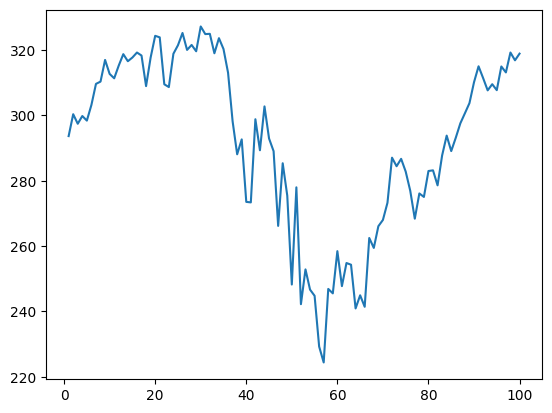

In [39]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))


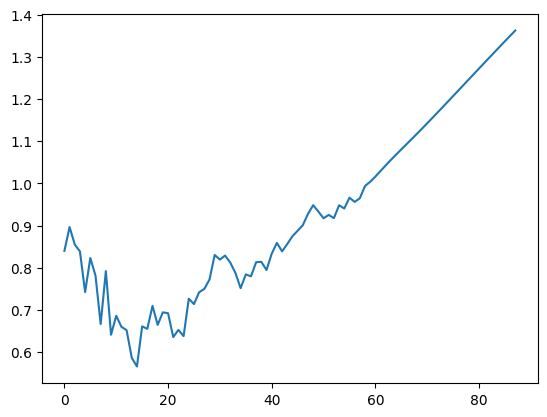

In [40]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [41]:
df3=scaler.inverse_transform(df3).tolist()

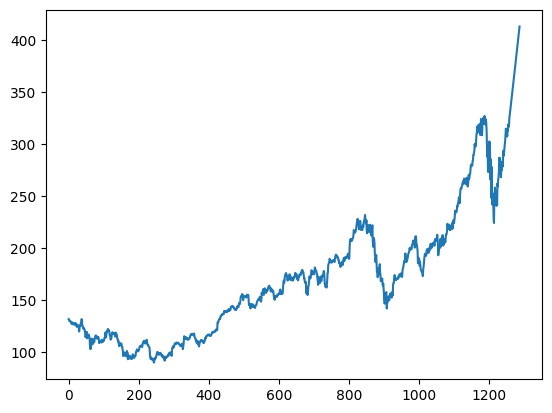

In [42]:
plt.plot(df3)